In [1]:
import numpy as np
from matplotlib import pyplot as plt
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam
from keras.initializers import TruncatedNormal
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import ROOT
from ROOT import TH1F, TCanvas, TTree, TFile
from array import array

Using TensorFlow backend.


Welcome to JupyROOT 6.11/03


## Info
30>high 30<low

In [2]:
files=["pi-30GeV.txt",
"pi-300GeV.txt",
"pi-200GeV.txt",
"pi-150GeV.txt",
"pi-100GeV.txt",
"pi-50GeV.txt",
"pi-30GeV.txt"]
#"pi-20GeV.txt"]
#"pi-9GeV.txt",
#"pi-8GeV.txt",
#"pi-7GeV.txt",
#"pi-6GeV.txt",
#"pi-5GeV.txt",
#"pi-4GeV.txt",
#"pi-3GeV.txt",
#"pi-2GeV.txt"]


In [3]:
lines9x9={}
lines3x4={}

#### Getting lines of length 9 and 4
the result is a map with the file

In [4]:
for i in files:
    prefix="pi-txt/"
    lines9x9buffer=[]
    lines3x4buffer=[]
    file = open(prefix+i)
    data=file.readlines()
    for l in data:
        line=np.fromstring(l.strip(),sep=" ")
        if len(line) == 9 :
            lines9x9buffer.append(line)
        if len(line) == 4 :
            lines3x4buffer.append(line)
    lines9x9[i]=lines9x9buffer
    lines3x4[i]=lines3x4buffer

In [5]:
def shapeimages9x9(lines):
    img9x9={}
    for key in lines.keys():
        counter=1
        imgs=[]
        img=[]
        for line in lines[key]:
            if counter%9==0:
                img.extend(line)
                imgs.append(img)
                img=[]
            else:
                img.extend(line)
            counter=counter+1
        img9x9[key]=imgs 
    return img9x9

def shapeimages3x4(lines):
    img3x4={}
    for key in lines.keys():
        counter=1
        imgs=[]
        img=[]
        for line in lines[key]:
            if counter%3==0:
                img.extend(line)
                imgs.append(img)
                img=[]
            else:
                img.extend(line)
            counter=counter+1
        img3x4[key]=imgs 
    return img3x4


In [6]:
img9x9 = shapeimages9x9(lines9x9)
img3x4 = shapeimages3x4(lines3x4)

#### Plotting img

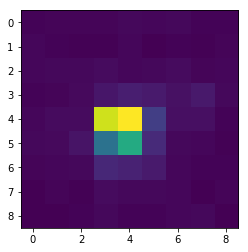

In [7]:
plt.imshow(np.array(img9x9['pi-100GeV.txt'][0]).reshape((9,9)))
plt.show()

In [8]:
#image A must be 3x4 flattened
def ImgMask3x3To9x9(A):
    B=np.zeros(81)
    #row 1
    B[0]=A[0]/6.0
    B[1]=A[0]/6.0
    B[2]=A[1]/9.0
    B[3]=A[1]/9.0
    B[4]=A[1]/9.0
    B[5]=A[2]/9.0
    B[6]=A[2]/9.0
    B[7]=A[2]/9.0
    B[8]=A[3]/3.0
    
    #row 2
    B[9] =A[0]/6.0
    B[10]=A[0]/6.0
    B[11]=A[1]/9.0
    B[12]=A[1]/9.0
    B[13]=A[1]/9.0
    B[14]=A[2]/9.0
    B[15]=A[2]/9.0
    B[16]=A[2]/9.0
    B[17]=A[3]/3.0

    #row 3
    B[18]=A[0]/6.0
    B[19]=A[0]/6.0
    B[20]=A[1]/9.0
    B[21]=A[1]/9.0
    B[22]=A[1]/9.0
    B[23]=A[2]/9.0
    B[24]=A[2]/9.0
    B[25]=A[2]/9.0
    B[26]=A[3]/3.0

    #row 4
    B[27]=A[4]/6.0
    B[28]=A[4]/6.0
    B[29]=A[5]/9.0
    B[30]=A[5]/9.0
    B[31]=A[5]/9.0
    B[32]=A[6]/9.0
    B[33]=A[6]/9.0
    B[34]=A[6]/9.0
    B[35]=A[7]/3.0

    #row 5
    B[36]=A[4]/6.0
    B[37]=A[4]/6.0
    B[38]=A[5]/9.0
    B[39]=A[5]/9.0
    B[40]=A[5]/9.0
    B[41]=A[6]/9.0
    B[42]=A[6]/9.0
    B[43]=A[6]/9.0
    B[44]=A[7]/3.0
    
    #row 6
    B[45]=A[4]/6.0
    B[46]=A[4]/6.0
    B[47]=A[5]/9.0
    B[48]=A[5]/9.0
    B[49]=A[5]/9.0
    B[50]=A[6]/9.0
    B[51]=A[6]/9.0
    B[52]=A[6]/9.0
    B[53]=A[7]/3.0

    #row 7
    B[54]=A[8]/6.0
    B[55]=A[8]/6.0
    B[56]=A[9]/9.0
    B[57]=A[9]/9.0
    B[58]=A[9]/9.0
    B[59]=A[10]/9.0
    B[60]=A[10]/9.0
    B[61]=A[10]/9.0
    B[62]=A[11]/3.0
    
    #row 8
    B[63]=A[8]/6.0
    B[64]=A[8]/6.0
    B[65]=A[9]/9.0
    B[66]=A[9]/9.0
    B[67]=A[9]/9.0
    B[68]=A[10]/9.0
    B[69]=A[10]/9.0
    B[70]=A[10]/9.0
    B[71]=A[11]/3.0

    #row 9
    B[72]=A[8]/6.0
    B[73]=A[8]/6.0
    B[74]=A[9]/9.0
    B[75]=A[9]/9.0
    B[76]=A[9]/9.0
    B[77]=A[10]/9.0
    B[78]=A[10]/9.0
    B[79]=A[10]/9.0
    B[80]=A[11]/3.0
    return B


In [9]:
img9x9_2={}
for img in img3x4:
    print("processing 3x4 to 9x9 %s"%(img))
    imgs=[]
    for i in img3x4[img]:
        imgs.append(ImgMask3x3To9x9(i))
    img9x9_2[img]=imgs

processing 3x4 to 9x9 pi-30GeV.txt
processing 3x4 to 9x9 pi-100GeV.txt
processing 3x4 to 9x9 pi-300GeV.txt
processing 3x4 to 9x9 pi-200GeV.txt
processing 3x4 to 9x9 pi-150GeV.txt
processing 3x4 to 9x9 pi-50GeV.txt


# Printing shapes and events
shapes for all 9x9 images and 4x3 extended to 9x9
and the number of events

In [10]:
img9x9.keys()


['pi-30GeV.txt',
 'pi-100GeV.txt',
 'pi-300GeV.txt',
 'pi-200GeV.txt',
 'pi-150GeV.txt',
 'pi-50GeV.txt']

In [11]:
print("original 9x9 images and file")
for i in img9x9:
    print("file %s \nshape "%(i))
    print(np.array(img9x9[i]).shape)
    
print("new images 9x9 from 3x4 and file")
for i in img9x9_2:
    print("file %s \nshape "%(i))
    print(np.array(img9x9_2[i]).shape)    

original 9x9 images and file
file pi-30GeV.txt 
shape 
(7374, 81)
file pi-100GeV.txt 
shape 
(14554, 81)
file pi-300GeV.txt 
shape 
(28126, 81)
file pi-200GeV.txt 
shape 
(9019, 81)
file pi-150GeV.txt 
shape 
(10668, 81)
file pi-50GeV.txt 
shape 
(12603, 81)
new images 9x9 from 3x4 and file
file pi-30GeV.txt 
shape 
(7374, 81)
file pi-100GeV.txt 
shape 
(14554, 81)
file pi-300GeV.txt 
shape 
(28126, 81)
file pi-200GeV.txt 
shape 
(9019, 81)
file pi-150GeV.txt 
shape 
(10668, 81)
file pi-50GeV.txt 
shape 
(12603, 81)


# Saving Train/Test for original 9x9 images

In [13]:
X_train = []
X_train_2ch = [] #two channels data
X_test = []
X_test_2ch = [] #two channels data
X_target = []
for i in img9x9:
    #ntest = np.array(img9x9[i]).shape[0] - 6000 
    ntest=1374
    print("proccesing %s taking 6000 event to train and %d to test"%(i,ntest))
    print(np.array(img9x9[i]).shape)
    imgs1=np.array(img9x9[i])
    imgs2=np.array(img9x9_2[i])
    print(imgs1.shape)
    print(imgs2.shape)
    imgs=[]
    imgs2ch=[]
    for index in range(imgs1.shape[0]):
        img2ch=np.dstack((imgs1[index],imgs2[index])).reshape((9,9,2))
        imgs2ch.append(img2ch)
        img = np.concatenate((imgs1[index],imgs2[index]))
        imgs.append(img)

    nimg=np.array(imgs)
    nimg2ch=np.array(imgs2ch)
    
    print(nimg.shape)
    X_train.extend(nimg[0:6000,:])
    X_train_2ch.extend(nimg2ch[0:6000,:,:,:])
    X_test.extend(nimg[6000:7374,:])
    X_test_2ch.extend(nimg2ch[6000:7374,:,:,:])
    if "pi-300GeV.txt" == i:
        X_target.extend(np.full(6000,300))
    if "pi-200GeV.txt" == i:
        X_target.extend(np.full(6000,200))       
    if "pi-150GeV.txt" == i:
        X_target.extend(np.full(6000,150))
    if "pi-100GeV.txt" == i:
        X_target.extend(np.full(6000,100))
    if "pi-50GeV.txt" == i:
        X_target.extend(np.full(6000,50))      
    if "pi-30GeV.txt" == i:
        X_target.extend(np.full(6000,30))       
    if "pi-20GeV.txt" == i:
        X_target.extend(np.full(6000,20))       
        

proccesing pi-30GeV.txt taking 6000 event to train and 1374 to test
(7374, 81)
(7374, 81)
(7374, 81)
(7374, 162)
proccesing pi-100GeV.txt taking 6000 event to train and 1374 to test
(14554, 81)
(14554, 81)
(14554, 81)
(14554, 162)
proccesing pi-300GeV.txt taking 6000 event to train and 1374 to test
(28126, 81)
(28126, 81)
(28126, 81)
(28126, 162)
proccesing pi-200GeV.txt taking 6000 event to train and 1374 to test
(9019, 81)
(9019, 81)
(9019, 81)
(9019, 162)
proccesing pi-150GeV.txt taking 6000 event to train and 1374 to test
(10668, 81)
(10668, 81)
(10668, 81)
(10668, 162)
proccesing pi-50GeV.txt taking 6000 event to train and 1374 to test
(12603, 81)
(12603, 81)
(12603, 81)
(12603, 162)


In [14]:
print(np.array(X_train).shape)
print(np.array(X_test).shape)
print(np.array(X_target).shape)
print(np.array(X_train_2ch).shape)
print(np.array(X_test_2ch).shape)

(36000, 162)
(8244, 162)
(36000,)
(36000, 9, 9, 2)
(8244, 9, 9, 2)


### Saving Train/Test for extended 9x9 images from 4x3

In [15]:
'''for i in img9x9_2:
    #ntest = np.array(img9x9_2[i]).shape[0] - 6000 
    ntest=1374    
    print("proccesing %s taking 6000 event to train and %d to test"%(i,ntest))
    print(np.array(img9x9_2[i]).shape)
    imgs = np.array(img9x9_2[i])
    X_train.extend(imgs[0:6000,:])
    X_test.extend(imgs[6000:7374,:])
    if "pi-300GeV.txt" == i:
        X_target.extend(np.full(6000,300))
    if "pi-200GeV.txt" == i:
        X_target.extend(np.full(6000,200))       
    if "pi-150GeV.txt" == i:
        X_target.extend(np.full(6000,150))
    if "pi-100GeV.txt" == i:
        X_target.extend(np.full(6000,100))
    if "pi-50GeV.txt" == i:
        X_target.extend(np.full(6000,50))      
    if "pi-30GeV.txt" == i:
        X_target.extend(np.full(6000,30))       
    if "pi-20GeV.txt" == i:
        X_target.extend(np.full(6000,20))       
'''        

'for i in img9x9_2:\n    #ntest = np.array(img9x9_2[i]).shape[0] - 6000 \n    ntest=1374    \n    print("proccesing %s taking 6000 event to train and %d to test"%(i,ntest))\n    print(np.array(img9x9_2[i]).shape)\n    imgs = np.array(img9x9_2[i])\n    X_train.extend(imgs[0:6000,:])\n    X_test.extend(imgs[6000:7374,:])\n    if "pi-300GeV.txt" == i:\n        X_target.extend(np.full(6000,300))\n    if "pi-200GeV.txt" == i:\n        X_target.extend(np.full(6000,200))       \n    if "pi-150GeV.txt" == i:\n        X_target.extend(np.full(6000,150))\n    if "pi-100GeV.txt" == i:\n        X_target.extend(np.full(6000,100))\n    if "pi-50GeV.txt" == i:\n        X_target.extend(np.full(6000,50))      \n    if "pi-30GeV.txt" == i:\n        X_target.extend(np.full(6000,30))       \n    if "pi-20GeV.txt" == i:\n        X_target.extend(np.full(6000,20))       \n'

In [16]:
print(np.array(X_train).shape)
print(np.array(X_test).shape)
print(np.array(X_target).shape)

(36000, 162)
(8244, 162)
(36000,)


## Creating a Keras Dense NN Model

In [17]:
# create model
model = Sequential()
model.add(Dense(256, input_dim=162, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
# Compile model


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               41728     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 41,985
Trainable params: 41,985
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(np.array(X_train),np.array(X_target), nb_epoch=25, verbose=1)

/usr/local/lib/python2.7/dist-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/25
36000/36000 [==============================] - 2s 42us/step - loss: 1376.9237
Epoch 2/25
36000/36000 [==============================] - 1s 36us/step - loss: 547.5703
Epoch 3/25
36000/36000 [==============================] - 1s 38us/step - loss: 534.2101
Epoch 4/25
36000/36000 [==============================] - 1s 37us/step - loss: 524.4370
Epoch 5/25
36000/36000 [==============================] - 1s 38us/step - loss: 516.0392
Epoch 6/25
36000/36000 [==============================] - 1s 36us/step - loss: 499.4110
Epoch 7/25
36000/36000 [==============================] - 1s 37us/step - loss: 486.3828
Epoch 8/25
36000/36000 [==============================] - 1s 39us/step - loss: 473.8638
Epoch 9/25
36000/36000 [==============================] - 1s 38us/step - loss: 464.9843
Epoch 10/25
36000/36000 [==============================] - 1s 37us/step - loss: 454.1394
Epoch 11/25
36000/36000 [==============================] - 1s 36us/step - loss: 439.0476
Epoch 12/25
36000/36000 [====

2017-11-26 17:55:54.170074: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA


In [19]:
pred=model.predict(np.array(X_test))

In [20]:
pred

array([[ 39.47492599],
       [ 28.2551651 ],
       [ 39.68316269],
       ..., 
       [ 57.03171158],
       [ 59.0381813 ],
       [ 36.03472519]], dtype=float32)

In [21]:
hist=TH1F("h1","pions",100,0,350)
for i in pred:
    hist.Fill(i)


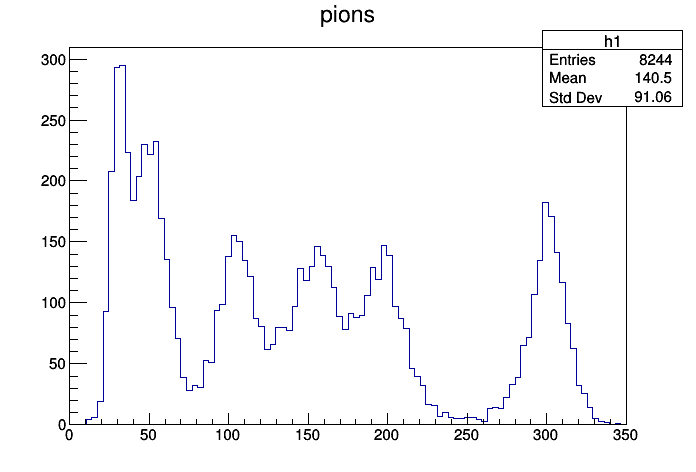

In [22]:
c=TCanvas()
hist.Draw()
c.Draw()

In [23]:
f = TFile( 'reg1train.root', 'recreate' )
reg = TTree("reg","pions")

In [24]:
train = array( 'f', np.array(X_train).shape[1]*[ 0.] )
target = array('i',[0])
print(np.array(X_train).shape[1])

162


In [25]:
reg.Branch( 'target', target, 'target/I' )
reg.Branch( 'var', train, 'var[162]/F' )

<ROOT.TBranch object ("var") at 0x5636f8ea7870>

In [26]:
for i in range(np.array(X_train).shape[0]):
   target[0] = X_target[i]
   for j in range(162):
    train[j] = X_train[i][j]
   reg.Fill()

In [27]:
reg.Write()
f.Close()

## Creating a Keras CNN Model

In [29]:
# create model
model = Sequential()
model.add(Conv2D(16, activation='relu', kernel_size=3, padding='same', kernel_initializer='TruncatedNormal', input_shape=(9,9,2)))
model.add(Conv2D(16, activation='relu', kernel_size=3, padding='same', kernel_initializer='TruncatedNormal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, input_dim=162, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
# Compile model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 9, 9, 16)          304       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 16)          2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 68,673
Trainable params: 68,673
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(np.array(X_train_2ch), np.array(X_target),batch_size=25,epochs=25,verbose=1, shuffle=True)

Epoch 1/25
36000/36000 [==============================] - 5s 138us/step - loss: 1026.3569
Epoch 2/25
36000/36000 [==============================] - 5s 132us/step - loss: 570.7547
Epoch 3/25
36000/36000 [==============================] - 5s 132us/step - loss: 549.7223
Epoch 4/25
36000/36000 [==============================] - 5s 134us/step - loss: 541.6981
Epoch 5/25
36000/36000 [==============================] - 5s 138us/step - loss: 508.4290
Epoch 6/25
36000/36000 [==============================] - 5s 138us/step - loss: 460.8596
Epoch 7/25
36000/36000 [==============================] - 5s 137us/step - loss: 430.4317
Epoch 8/25
36000/36000 [==============================] - 5s 136us/step - loss: 401.5194
Epoch 9/25
36000/36000 [==============================] - 5s 138us/step - loss: 382.4415
Epoch 10/25
36000/36000 [==============================] - 5s 139us/step - loss: 371.3002
Epoch 11/25
36000/36000 [==============================] - 5s 139us/step - loss: 360.6540
Epoch 12/25
36000/

In [38]:
pred2ch=model.predict(np.array(X_test_2ch))

Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


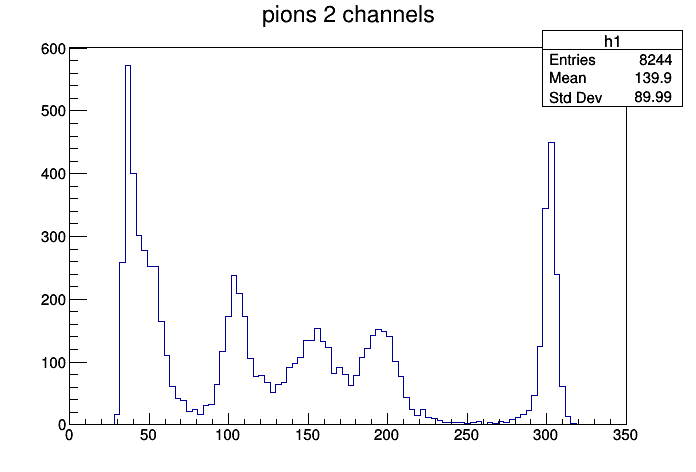

In [39]:
hist=TH1F("h1","pions 2 channels",100,0,350)
for i in pred2ch:
    hist.Fill(i)
c=TCanvas()
hist.Draw()
c.Draw()

In [28]:
model.fit?

In [30]:
np.array(X_train).shape

(36000, 162)